## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

## Load data

In [6]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

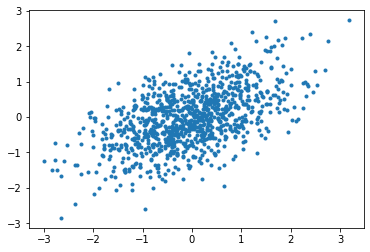

In [7]:
plt.plot(x_train, y_train, '.')

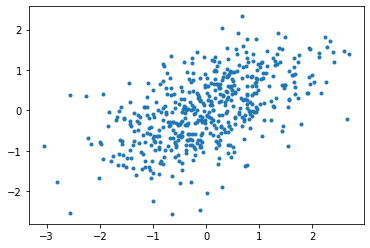

In [8]:
test_df = pd.read_csv("test_data.csv")
x_test, y_test = test_df['x_test'], test_df['y_test']
plt.plot(x_test, y_test, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [9]:
def LinearRegression_MSE(x_data, y_data, L=0.001, epochs=10000):
    """Construct a Linear regression model(y = b0 + b1x) with MSE as objective function.

    Arguments:
    L -- learning rate
    epochs -- number of iterations
    """
    # random initialize b0, b1 between [-1, 1]
    b0 = random.uniform(-1, 1)
    b1 = random.uniform(-1, 1)
    print('initial b0, b1:', b0, b1)

    X = x_data
    Y = y_data
    n = len(X)

    record_MSE, record_MAE = [], [] # keep track of loss

    # Gradient Descent 
    for i in range(epochs): 
        Y_pred = b0 + b1 * X  # The current predicted value
        
        MSE_loss = sum((Y - Y_pred)**2) / n
        MAE_loss = sum(abs(Y - Y_pred)) / n

        D_b0 = (-2/n) * sum(Y - Y_pred)  # Derivative wrt b0
        D_b1 = (-2/n) * sum((Y - Y_pred) * X)  # Derivative wrt b1
        b0 = b0 - L * D_b0  # Update b0
        b1 = b1 - L * D_b1  # Update b1

        record_MSE.append(MSE_loss)
        record_MAE.append(MAE_loss)
    
    return b0, b1, record_MSE, record_MAE

initial b0, b1: 0.8445569174611862 -0.8575675761618466
final b0, b1: -0.0012672033823307798 0.45273456471396933
final MSE: 0.47089455849266565
final MAE: 0.5503357957657344


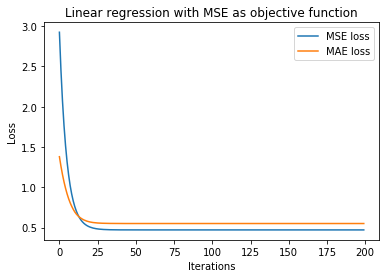

In [10]:
B0_MSEmodel, B1_MSEmodel, record_MSE, record_MAE = LinearRegression_MSE(x_train, y_train, L=0.05, epochs=200)
print('final b0, b1:', B0_MSEmodel, B1_MSEmodel)
print('final MSE:', record_MSE[-1])
print('final MAE:', record_MAE[-1])

# Draw the learning curve of LinearRegression_MSE model
x = range(0, len(record_MSE))
y1 = record_MSE
y2 = record_MAE
plt.title("Linear regression with MSE as objective function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(x, y1, label='MSE loss')
plt.plot(x, y2, label='MAE loss')
plt.legend()
plt.show()

In [11]:
def LinearRegression_MAE(x_data, y_data, L=0.001, epochs=10000):
    """Construct a Linear regression model(y = b0 + b1x) with MAE as objective function.

    Arguments:
    L -- learning rate
    epochs -- number of iterations
    """
    # random initialize b0, b1 between [-1, 1]
    b0 = random.uniform(-1, 1)
    b1 = random.uniform(-1, 1)
    print('initial b0, b1:', b0, b1)

    X = x_data
    Y = y_data
    n = len(X)

    record_MSE, record_MAE = [], [] # keep track of loss

    # Gradient Descent 
    for i in range(epochs): 
        Y_pred = b0 + b1 * X  # the current predicted value
        
        MSE_loss = sum((Y - Y_pred)**2) / n
        MAE_loss = sum(abs(Y - Y_pred)) / n

        D_b0 = sum([np.sign(tmp) for tmp in (Y_pred - Y)]) / n # Derivative wrt b0
        D_b1 = sum([np.sign(tmp) * x for tmp, x in zip((Y_pred - Y), X)]) / n # Derivative wrt b1
        b0 = b0 - L * D_b0  # update b0
        b1 = b1 - L * D_b1  # update b1

        record_MSE.append(MSE_loss)
        record_MAE.append(MAE_loss)
    
    return b0, b1, record_MSE, record_MAE

initial b0, b1: 0.6806835798653046 -0.7251836408361216
final b0, b1: -0.03811642013469536 0.4350884947384487
final MSE: 0.47248642635001475
final MAE: 0.5492654104051017


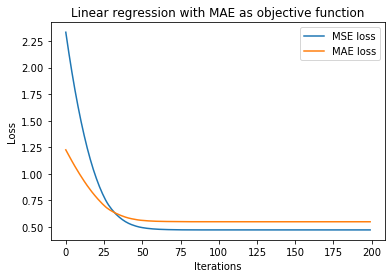

In [12]:
B0_MAEmodel, B1_MAEmodel, record_MSE, record_MAE = LinearRegression_MAE(x_train, y_train, L=0.05, epochs=200)
print('final b0, b1:', B0_MAEmodel, B1_MAEmodel)
print('final MSE:', record_MSE[-1])
print('final MAE:', record_MAE[-1])

# Draw the learning curve of LinearRegression_MAE model
x = range(0, len(record_MSE))
y1 = record_MSE
y2 = record_MAE
plt.title("Linear regression with MAE as objective function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(x, y1, label='MSE loss')
plt.plot(x, y2, label='MAE loss')
plt.legend()
plt.show()

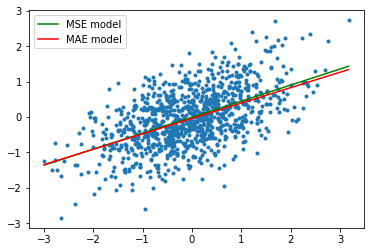

In [13]:
# Draw the regression line of LinearRegression_MSE model and LinearRegression_MAE model on training data
plt.plot(x_train, y_train, '.')
y_pred_MSEmodel = B0_MSEmodel + B1_MSEmodel * x_train
plt.plot([min(x_train), max(x_train)], [min(y_pred_MSEmodel), max(y_pred_MSEmodel)], color='green', label='MSE model')
y_pred_MAEmodel = B0_MAEmodel + B1_MAEmodel * x_train
plt.plot([min(x_train), max(x_train)], [min(y_pred_MAEmodel), max(y_pred_MAEmodel)], color='red', label='MAE model')
plt.legend()
plt.show()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [14]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [15]:
# y_pred = model(x_test)
y_pred_MSEmodel = B0_MSEmodel + B1_MSEmodel * x_test
y_pred_MAEmodel = B0_MAEmodel + B1_MAEmodel * x_test

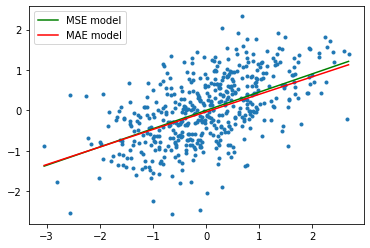

In [16]:
# Draw the regression line of LinearRegression_MSE model and LinearRegression_MAE model on testing data
plt.plot(x_test, y_test, '.')
plt.plot([min(x_test), max(x_test)], [min(y_pred_MSEmodel), max(y_pred_MSEmodel)], color='green', label='MSE model')
plt.plot([min(x_test), max(x_test)], [min(y_pred_MAEmodel), max(y_pred_MAEmodel)], color='red', label='MAE model')
plt.legend()
plt.show()

In [17]:
# Evalulate the LinearRegression_MSE model with test data
n = len(y_test)
resultMSE = sum((y_test - y_pred_MSEmodel)**2) / n
resultMAE = sum(abs(y_test - y_pred_MSEmodel)) / n
print('the MSE of LinearRegression_MSE model:', resultMSE)
print('the MAE of LinearRegression_MSE model:', resultMAE)

the MSE of LinearRegression_MSE model: 0.4909025642357121
the MAE of LinearRegression_MSE model: 0.5613177326821343


In [18]:
# Evalulate the LinearRegression_MAE model with test data
n = len(y_test)
resultMSE = sum((y_test - y_pred_MAEmodel)**2) / n
resultMAE = sum(abs(y_test - y_pred_MAEmodel)) / n
print('the MSE of LinearRegression_MAE model:', resultMSE)
print('the MAE of LinearRegression_MAE model:', resultMAE)

the MSE of LinearRegression_MAE model: 0.49425566626080036
the MAE of LinearRegression_MAE model: 0.5639100695775265
